In [190]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import scipy.optimize as opt
import os

from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.externals.six import StringIO
from matplotlib.ticker import NullFormatter

%matplotlib inline

In [ ]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
# K Nearest Neighbors
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [3]:
!wget -O data/teleCust1000t.csv http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

df = pd.read_csv("data" + os.path.sep + "teleCust1000t.csv")
df.head()

--2020-02-12 10:59:22--  http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'data/teleCust1000t.csv'

data/teleCust1000t. 100%[===================>]  36.18K  --.-KB/s    in 0.09s   

2020-02-12 10:59:22 (401 KB/s) - 'data/teleCust1000t.csv' saved [37048/37048]



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


The custcat value counts:
3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a38d670>]],
      dtype=object)

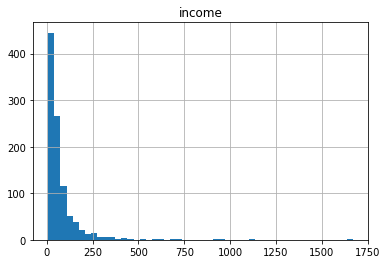

In [11]:
# A telecommunications provider has segmented its customer base by service usage patterns,
# categorizing the customers into four groups. If demographic data can be used to predict
# group membership, the company can customize offers for individual prospective customers.
# It is a classification problem. That is, given the dataset, with predefined labels, we 
# need to build a model to be used to predict class of a new or unknown case.

# The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

# The target field, called 'custcat', has four possible values that correspond to the four 
# customer groups, as follows:
# 1- Basic Service
# 2- E-Service 
# 3- Plus Service
# 4- Total Service

# Our objective is to build a classifier, to predict the class of unknown cases. 
# We will use a specific type of classification called K nearest neighbour.

print('The custcat value counts:')
print(df['custcat'].value_counts())

df.hist(column = 'income', bins = 50)

In [22]:
# Define the feature set:

print("Feature set: ", df.columns)

# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array

columns = list(df.columns)
columns.remove('custcat')

# Values gives a numpy.ndarray array
X = df[columns].values
print("type(X) = ", type(X))

display(X[0:5])

# Values gives a numpy.ndarray array
Y = df['custcat'].values
print("type(Y) = ", type(Y))

display(Y[0:5])

Feature set:  Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')
type(X) =  <class 'numpy.ndarray'>


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

type(Y) =  <class 'numpy.ndarray'>


array([1, 4, 3, 1, 3])

In [24]:
# Now we cale the data using the StandardScaler which gives data zero mean and unit variance
# It is good practice, especially for algorithms such as KNN which is based on distance of cases
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

display(X[0:5])

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [29]:
# Split the set into the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

print('Train set, X: ', X_train.shape, ', Y: ', Y_train.shape )
print('Test set, X: ', X_test.shape, ', Y: ', Y_test.shape )

Train set, X:  (800, 11) , Y:  (800,)
Test set, X:  (200, 11) , Y:  (200,)


In [37]:
# Train the classifier model setting the k to 4
k = 4

kn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)

# Predict the values on the test set
Y_test_hat = kn_model.predict(X_test)

# Compute the accuracy
print('Train set accuracy : ', metrics.accuracy_score(Y_train, kn_model.predict(X_train)))
print('Test set accuracy : ', metrics.accuracy_score(Y_test, Y_test_hat))

Train set accuracy :  0.5475
Test set accuracy :  0.32


In [53]:
# The best k to be used is to be selected based on the iterative procedure
SupK = 100
mean_acc = np.zeros(SupK - 1)
std_acc = np.zeros(SupK - 1)

for k in range(1, SupK):
    kn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
    Y_test_hat = kn_model.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(Y_test, Y_test_hat)
    std_acc[k-1] = np.std(Y_test == Y_test_hat) / np.sqrt(Y_test_hat.shape[0])

print('Accuracy values for k in', 1, 'to' , SupK, ':', mean_acc)

Accuracy values for k in 1 to 100 : [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34  0.33  0.315 0.34
 0.33  0.315 0.34  0.36  0.355 0.35  0.345 0.335 0.35  0.36  0.37  0.365
 0.365 0.365 0.35  0.36  0.38  0.385 0.395 0.395 0.38  0.37  0.365 0.385
 0.395 0.41  0.395 0.395 0.395 0.38  0.39  0.375 0.365 0.38  0.375 0.375
 0.365 0.36  0.36  0.365 0.37  0.38  0.37  0.37  0.37  0.36  0.35  0.36
 0.355 0.36  0.36  0.36  0.34  0.34  0.345 0.35  0.35  0.355 0.365 0.355
 0.355 0.365 0.37  0.37  0.37  0.35  0.35  0.35  0.35  0.36  0.355 0.33
 0.32  0.345 0.345 0.345 0.335 0.345 0.355 0.345 0.345 0.34  0.34  0.335
 0.345 0.325 0.315]


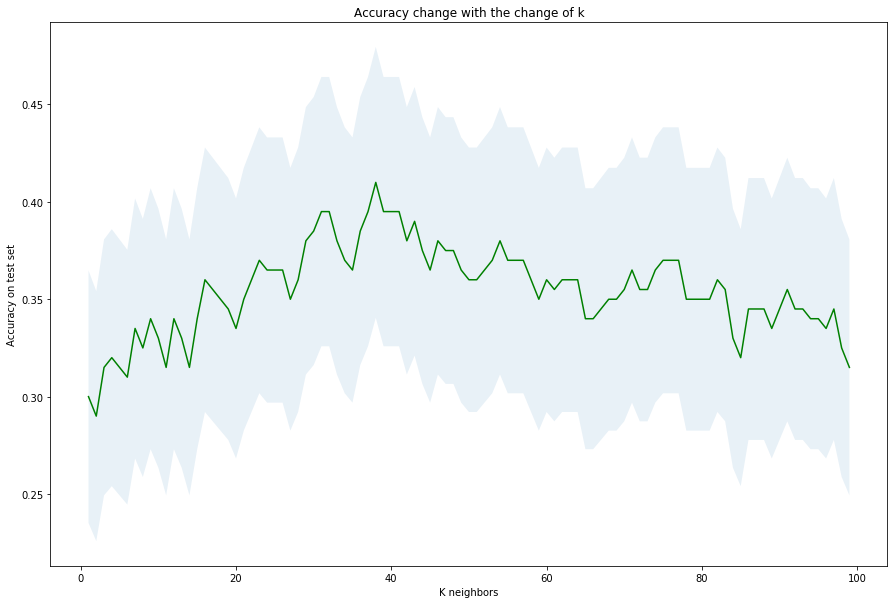

In [59]:
# Plot the changes of the accuracy with the change of K
plt.figure(figsize = (15, 10))
plt.plot(range(1, SupK), mean_acc, 'g')

# Add the 95% confidence interval
plt.fill_between(range(1, SupK),
                 mean_acc - 2 * std_acc,
                 mean_acc + 2 * std_acc,
                 alpha = 0.10)

plt.title('Accuracy change with the change of k')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy on test set')

plt.show()

In [54]:
# Print the best found value of k
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax() + 1) 

The best accuracy was with 0.41 with k = 38


In [ ]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
# Decision Tree Classifiers
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [71]:
# Download and load the data
!wget -O data/drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

my_data = pd.read_csv( "data" + os.path.sep + "drug200.csv", delimiter=",")
my_data[0:5]

--2020-02-12 13:04:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: 'data/drug200.csv'

data/drug200.csv    100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-02-12 13:04:40 (303 MB/s) - 'data/drug200.csv' saved [6027/6027]



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [72]:
# We have a collection of data about a set of patients, all of whom suffered from the same 
# illness. During their course of treatment, each patient responded to one of 5 medications,
# Drug A, Drug B, Drug c, Drug x and y.

# Part of your job is to build a model to find out which drug might be appropriate for a
# future patient with the same illness. The feature sets of this dataset are Age, Sex,
# Blood Pressure, and Cholesterol of patients, and the target is the drug that each
# patient responded to.

# It is a sample of binary classifier, and you can use the training part of the dataset
# to build a decision tree, and then use it to predict the class of a unknown patient,
# or to prescribe it to a new patient. 

print('Data size:', my_data.size)
print('Data shape:', my_data.shape)
print('Columns:', my_data.columns)

Data size: 1200
Data shape: (200, 6)
Columns: Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [73]:
# Define the data arrays
target = 'Drug'
source = list(my_data.columns)
source.remove(target)

X = my_data[source].values
display(X[0:5])

Y = my_data[target].values
display(Y[0:5])

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [74]:
# Sklearn Decision Trees do not handle categorical variables
# We could convert these features to numerical values by pandas.get_dummies()
# However here we will use the LabelEncoder from the sklearn.preprocessing

def transform_to_num(data, idx, values):
    le = preprocessing.LabelEncoder()
    le.fit(values)
    data[:,idx] = le.transform(data[:,idx])

transform_to_num(X, 1, ['F', 'M'])
transform_to_num(X, 2, ['LOW', 'NORMAL', 'HIGH'])
transform_to_num(X, 3, ['NORMAL', 'HIGH'])

display(X[0:5])


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [77]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

print('Train X', X_train.shape, 'Y', Y_train.shape)
print('Test X', X_test.shape, 'Y', Y_test.shape)

Train X (140, 5) Y (140,)
Test X (60, 5) Y (60,)


In [81]:
# Create, Train and Evaluate the Decision Tree Classifier
drugTree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)

# Train on the train set
drugTree.fit(X_train, Y_train)

# Predict on the test set
Y_test_hat = drugTree.predict(X_test)

display(Y_test_hat[0:5])

print("Train DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_train, drugTree.predict(X_train)))
print("Test DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, Y_test_hat))

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

Train DecisionTrees's Accuracy:  1.0
Test DecisionTrees's Accuracy:  0.9833333333333333


In [92]:
# Compute accuracy manually
le_drug = preprocessing.LabelEncoder()
le_drug.fit(my_data.Drug.unique())
Y_test_num = le_drug.transform(Y_test) 
Y_test_hat_num = le_drug.transform(Y_test_hat) 

TP_TN = (Y_test_num == Y_test_hat_num)
tp_tn_sum = TP_TN.sum()
FP_FN = (Y_test_num != Y_test_hat_num)
fp_fn_sum = FP_FN.sum()

accuracy = tp_tn_sum / ( tp_tn_sum + fp_fn_sum)
print('Accuracy:', accuracy)

Accuracy: 0.9833333333333333


In [94]:
# Install the packages needed for the subsequent visualization 
!pip3 install pydotplus
!pip3 install graphviz

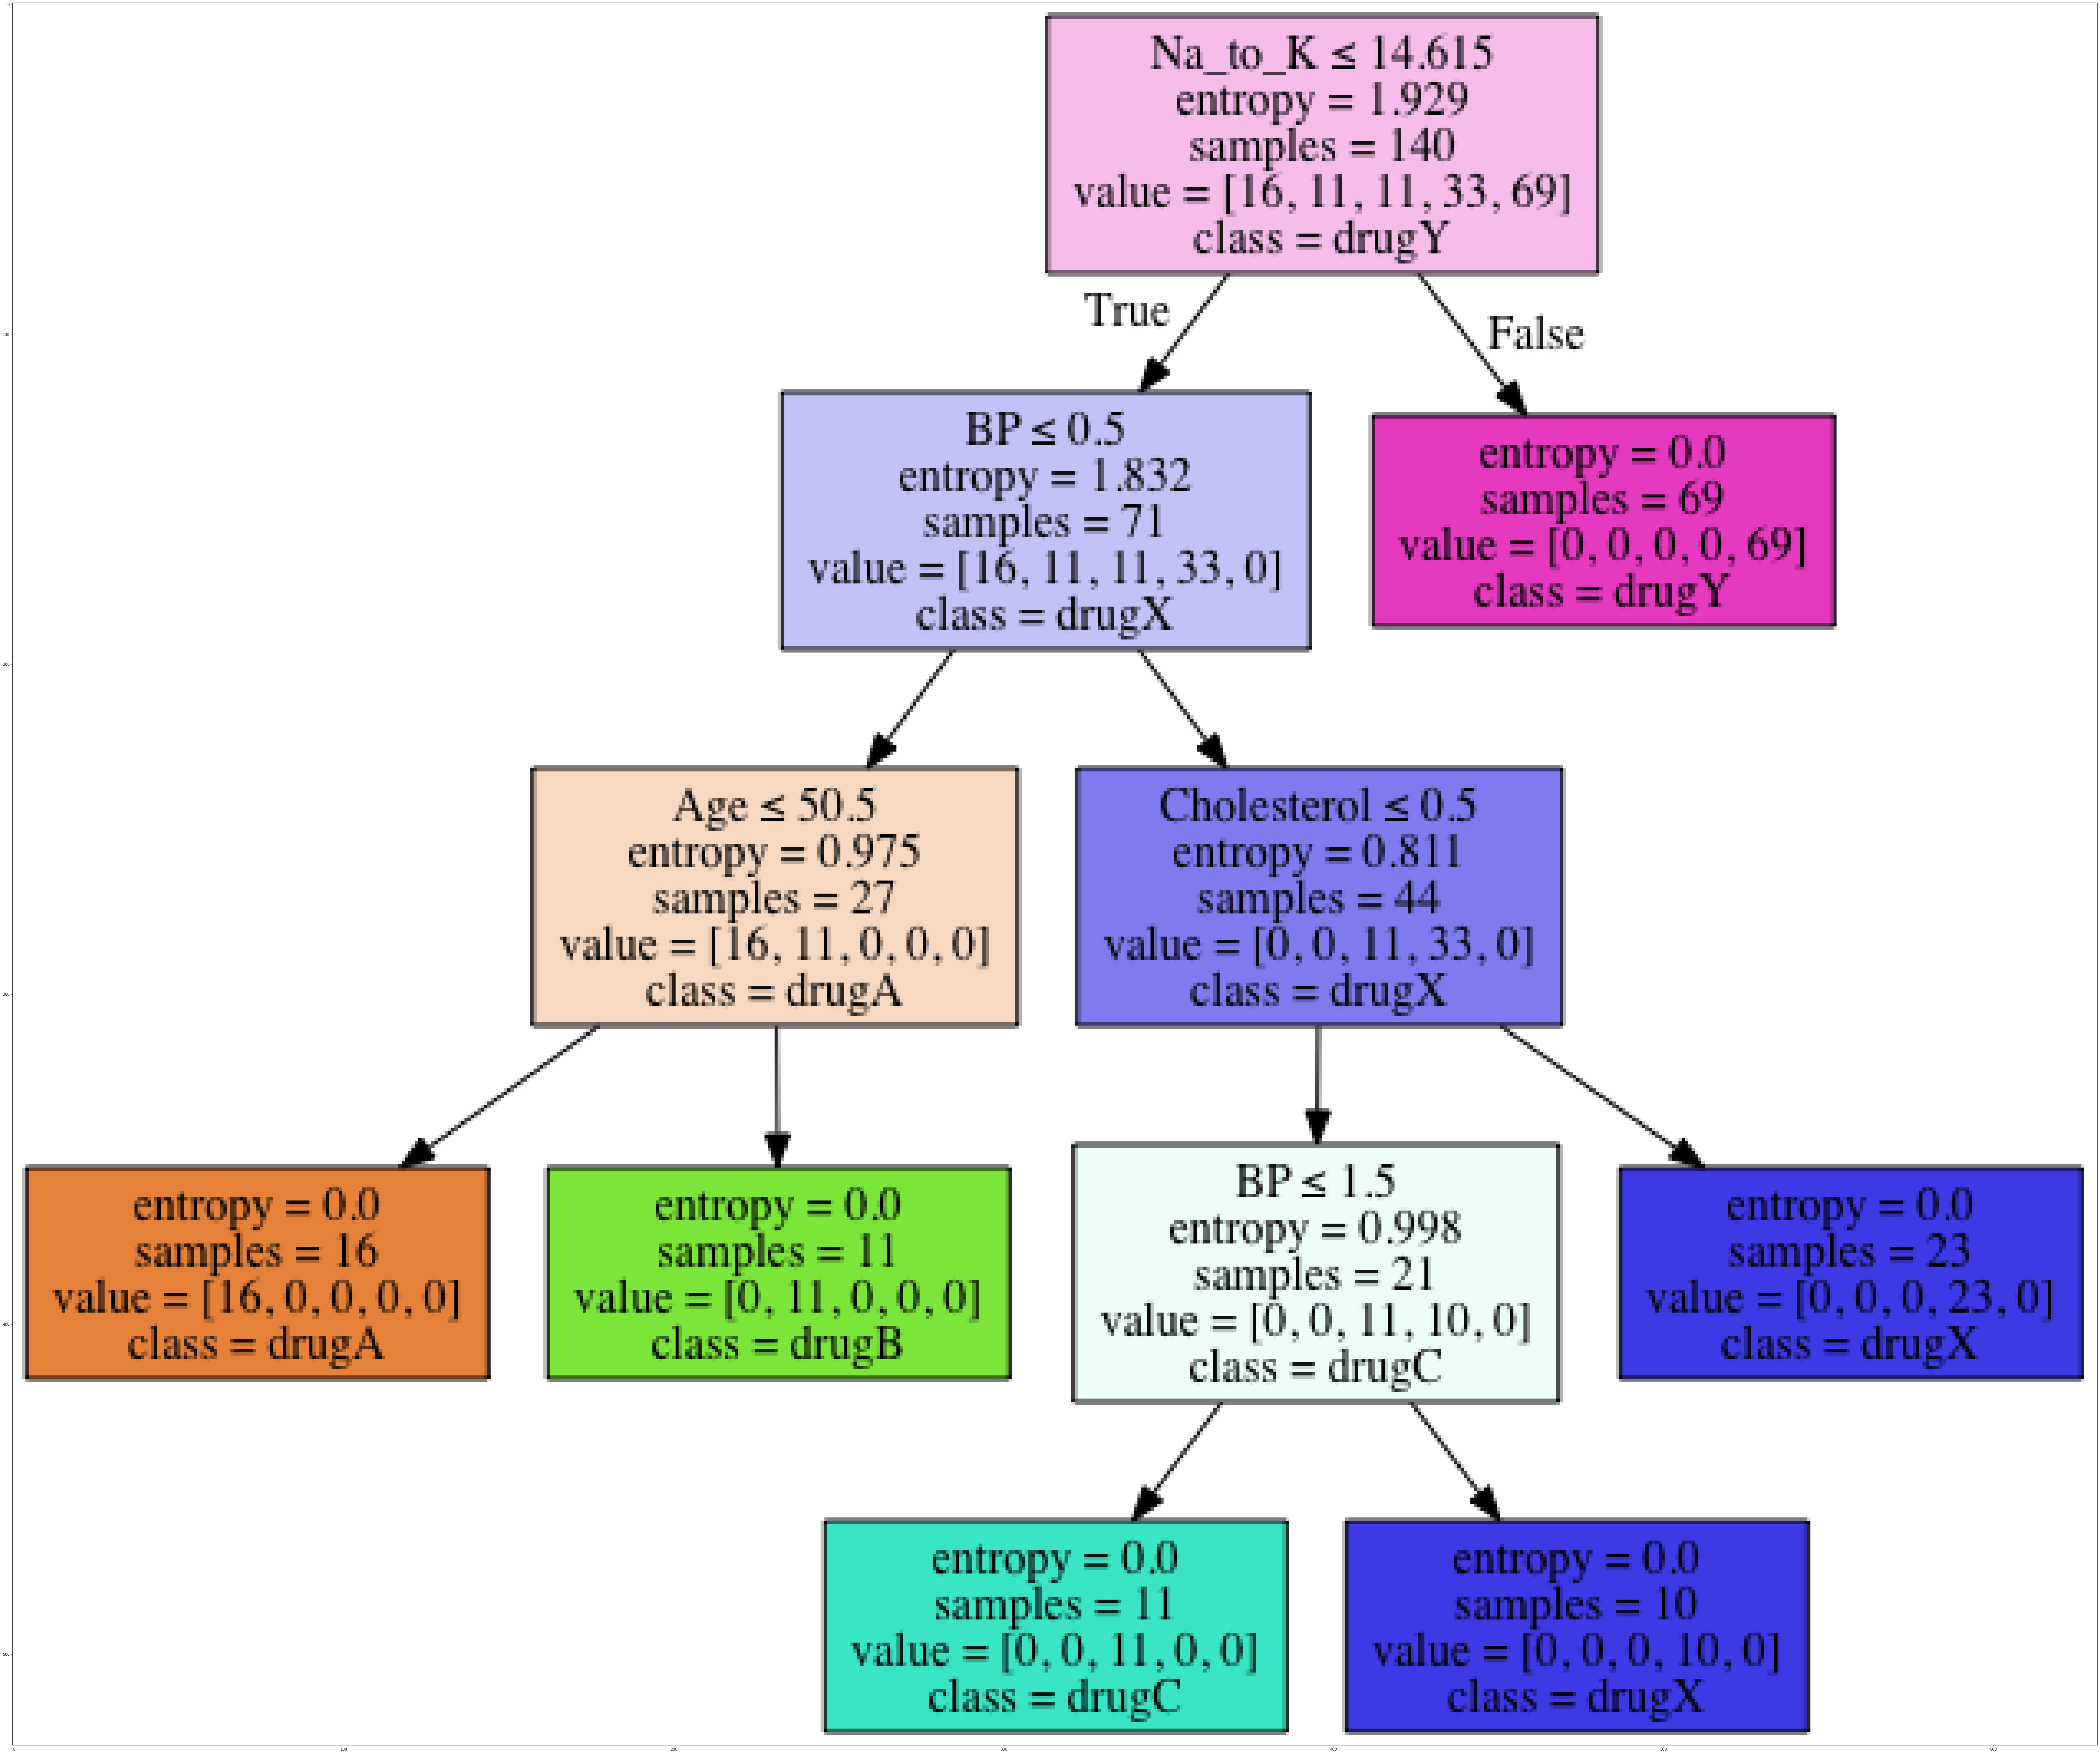

In [100]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames  = my_data["Drug"].unique().tolist()

out = tree.export_graphviz(drugTree,
                           feature_names = featureNames,
                           out_file = dot_data,
                           class_names = np.unique(Y_train),
                           filled = True,
                           special_characters = True,
                           rotate = False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)

img = mpimg.imread(filename)

plt.figure(figsize = (100, 200))
plt.imshow(img, interpolation = 'nearest')

In [101]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
# Logistic Regression
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [154]:
# Download and load the data
!wget -O data/ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

churn_df = pd.read_csv("data" + os.path.sep + "ChurnData.csv")
churn_df.head()

--2020-02-12 15:57:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: 'data/ChurnData.csv'

data/ChurnData.csv  100%[===================>]  35.30K  --.-KB/s    in 0.09s   

2020-02-12 15:57:52 (392 KB/s) - 'data/ChurnData.csv' saved [36144/36144]



,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [155]:
# This is a historical customer dataset where each row represents one customer.
# The data is relatively easy to understand, and you may uncover insights you 
# can use immediately. Typically it is less expensive to keep customers than 
# acquire new ones, so the focus of this analysis is to predict the customers
# who will stay with the company.

# This data set provides information to help you predict what behavior will 
# help you to retain customers. You can analyze all relevant customer data 
# and develop focused customer retention programs.

# The dataset includes information about:
#
#  * Customers who left within the last month – the column is called Churn
#  * Services that each customer has signed up for – phone, multiple lines, 
#    internet, online security, online backup, device protection, tech support,
#    and streaming TV and movies
#  * Customer account information – how long they had been a customer, contract,
#    payment method, paperless billing, monthly charges, and total charges
#  * Demographic info about customers – gender, age range, and if they
#    have partners and dependents

print('Churn data set:', churn_df.shape)
print('The columns:', churn_df.columns.values)

Churn data set: (200, 28)
The columns: ['tenure' 'age' 'address' 'income' 'ed' 'employ' 'equip' 'callcard'
 'wireless' 'longmon' 'tollmon' 'equipmon' 'cardmon' 'wiremon' 'longten'
 'tollten' 'cardten' 'voice' 'pager' 'internet' 'callwait' 'confer'
 'ebill' 'loglong' 'logtoll' 'lninc' 'custcat' 'churn']


In [156]:
# Select some features for the modeling. Also we change the target data
# type to be integer, as it is a requirement by the skitlearn algorithm:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]

churn_df['churn'] = churn_df['churn'].astype(int)

churn_df.head()

print('Churn data set:', churn_df.shape)

Churn data set: (200, 10)


In [157]:
# Define the feature and target vectors
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

Y = np.asarray(churn_df['churn'])
Y [0:5]

# Scale the features
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [158]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

print('Train X', X_train.shape, 'Y', Y_train.shape)
print('Test X', X_test.shape, 'Y', Y_test.shape)

Train X (160, 7) Y (160,)
Test X (40, 7) Y (40,)


In [159]:
# Create, Train, Predict LogisticRegression model
lg_mod = LogisticRegression(C = 0.01, solver = 'liblinear')

lg_mod.fit(X_train, Y_train)

Y_test_hat = lg_mod.predict(X_test)
print('Predicted classes: ', Y_test_hat[0:10])

# The first column is the probability of class 1, P(Y=1|X), 
# and second column is probability of class 0, P(Y=0|X):
Y_test_hat_prob = lg_mod.predict_proba(X_test)
print('Predicted probabilities: ', Y_test_hat_prob[0:10])


Predicted classes:  [0 0 0 0 0 0 0 0 1 0]
Predicted probabilities:  [[0.54 0.46]
 [0.61 0.39]
 [0.56 0.44]
 [0.63 0.37]
 [0.56 0.44]
 [0.55 0.45]
 [0.52 0.48]
 [0.61 0.39]
 [0.41 0.59]
 [0.63 0.37]]


In [160]:
# Evaluate the predictions by different means

# 1. Jaccard Similarity Coefficient Score
# The size of the intersection divided by the size of the union of two label sets
print('Jaccard Similarity Score', jaccard_score(Y_test, Y_test_hat))

# 2. Confusions matrix
print('Confusions matrix:')
print(confusion_matrix(Y_test, Y_test_hat, labels=[1,0]))



Jaccard Similarity Score 0.375
Confusions matrix:
[[ 6  9]
 [ 1 24]]


In [161]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


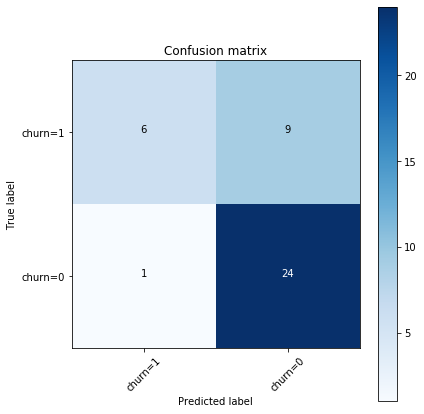

In [162]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_test_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (6,6))
plot_confusion_matrix(cnf_matrix, classes = ['churn=1','churn=0'],
                      normalize = False,  title = 'Confusion matrix')

In [163]:
# Print the classification report
print(classification_report(Y_test, Y_test_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [165]:
# Print the log loss
print('Log loss:', log_loss(Y_test, Y_test_hat_prob))

Log loss: 0.6017092478101185


In [ ]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
# Support Vector Machines
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [167]:
# Download and load the data set
!wget -O data/cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

cell_df = pd.read_csv( "data" + os.path.sep + "cell_samples.csv")
cell_df.head()

--2020-02-12 16:39:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: 'data/cell_samples.csv'

data/cell_samples.c 100%[===================>]  20.19K  --.-KB/s    in 0.09s   

2020-02-12 16:39:54 (232 KB/s) - 'data/cell_samples.csv' saved [20675/20675]



,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# The dataset consists of several hundred human cell sample records, 
# each of which contains the values of a set of cell characteristics. 
# The fields in each record are:
# 
# Field name - Description
# ID - Clump thickness
# Clump - Clump thickness
# UnifSize - Uniformity of cell size
# UnifShape - Uniformity of cell shape
# MargAdh - Marginal adhesion
# SingEpiSize - Single epithelial cell size
# BareNuc - Bare nuclei
# BlandChrom - Bland chromatin
# NormNucl - Normal nucleoli
# Mit - Mitoses
# Class - Benign or malignant

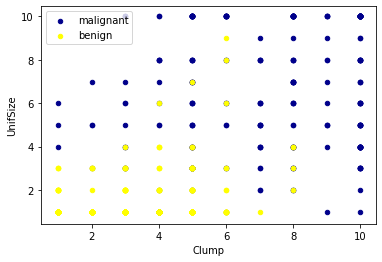

In [172]:
# The Class field contains the diagnosis, as confirmed by separate
# medical procedures, as to whether the samples are benign 
# (value = 2) or malignant (value = 4).

# Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:
ax = cell_df[cell_df['Class'] == 4].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [173]:
# Look at the data types of the data set columns
print(cell_df.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


In [177]:
# Let us drop the non-numeric rows of the BareNuc column
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)
display(cell_df.head())
print(cell_df.dtypes)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object


In [181]:
# Get the X and the Y matrices
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

cell_df['Class'] = cell_df['Class'].astype('int')
Y = np.asarray(cell_df['Class'])

In [182]:
# Split the data into the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [186]:
#Instantiae, train and predict
clf = svm.SVC(kernel='rbf', gamma = 'scale')

clf.fit(X_train, Y_train) 

Y_test_hat = clf.predict(X_test)

display(Y_test_hat)

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


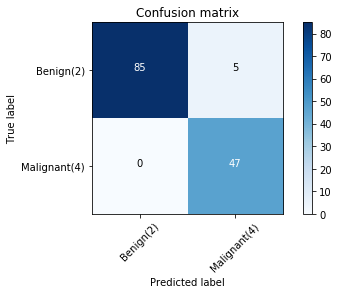

In [188]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_test_hat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, Y_test_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Benign(2)','Malignant(4)'],
                      normalize = False,  title = 'Confusion matrix')

In [191]:
# The F1-score is close to 1
f1_score(Y_test, Y_test_hat, average='weighted') 

0.9639038982104676

In [193]:
# The jaccard index for accuracy is also close to 1
jaccard_similarity_score(Y_test, Y_test_hat)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.9635036496350365